In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from statsmodels.tsa.arima.model import ARIMA

In [2]:
column_names = ["identification", "ground_communication_type", "ground_communication_number", "day_month_year", 
                "weekday", "time", "accident_type", "type_of_collision_of_vehicles", "type_of_obstacle", 
                "life_consequences", "culprits_of_accident", "alcohol_in_culprit", "main_cause_of_accident", 
                "number_of_persons_died", "number_of_seriously_injured", "number_of_lightly_injured", 
                "total_material_damage", "type_of_road_surface", "condition_of_road_surface", 
                "condition_of_communication", "wind_condition", "visibility", "p20", "p21", "p22", "p23", "p24", 
                "p27", "p28", "p34", "p35", "p39", "p44", "p45a", "p47", "p48a", "p49", "p50a", "p50b", "p51", 
                "p52", "p53", "p55a", "p57", "p58", "a", "b", "d", "e", "f", "g", "h", "i", "j", "k", "l", "n", 
                "o", "p", "q", "r", "s", "t", "p5a"]
df_list = []

filepaths = ['./data-nehody/data_GIS_12-' + str(y) for y in range(2016, 2023)]

for path in filepaths:
    csv_files = glob.glob(path + "/*.csv")
    dfs_in_file = [pd.read_csv(file, sep=";", encoding='ANSI', header=None, low_memory=False) for file in csv_files]
    df_list.append(pd.concat(dfs_in_file, axis=0, ignore_index=True))

accidents_df = pd.concat(df_list, axis=0, ignore_index=True)
accidents_df.columns = column_names

accidents_df.loc[accidents_df.p47=='XX', 'p47'] = np.nan

accidents_df.loc[accidents_df.time>2400, 'time'] = 0
accidents_df.loc[accidents_df.time%100>=60, 'time'] = 0
accidents_df['time'] = accidents_df['time'].map(str).str.pad(4, fillchar='0').map(lambda t: t[:2] + ':' + t[2:])
accidents_df['date'] = pd.to_datetime(accidents_df['day_month_year'] + ' ' + accidents_df['time'])

In [3]:
accidents_df

,identification,ground_communication_type,ground_communication_number,day_month_year,weekday,time,accident_type,type_of_collision_of_vehicles,type_of_obstacle,life_consequences,...,l,n,o,p,q,r,s,t,p5a,date
0,2100160001,4,NaN,2016-01-01,5,00:55,1,1,0,2,...,NaN,711403,NaN,Souhlasnýsesměremúseku,Pomalý,554782.0,451622.0,GN_V0.1UIR-ADR_410,1,2016-01-01 00:55:00
1,2100160002,4,NaN,2016-01-01,5,01:30,1,3,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2016-01-01 01:30:00
2,2100160003,5,NaN,2016-01-01,5,01:00,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2016-01-01 01:00:00
3,2100160004,6,NaN,2016-01-01,5,01:20,9,0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2016-01-01 01:20:00
4,2100160005,6,NaN,2016-01-01,5,00:00,2,0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2016-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707022,190910224060,3,21030.0,2022-12-28,3,08:35,5,0,0,2,...,21030,NaN,NaN,NaN,NaN,511587.0,NaN,NaN,2,2022-12-28 08:35:00
707023,190910224148,8,NaN,2022-12-27,2,19:00,3,0,6,2,...,NaN,NaN,NaN,NaN,NaN,538434.0,554553.0,NaN,1,2022-12-27 19:00:00
707024,190910224288,6,NaN,2022-12-30,5,10:00,3,0,3,2,...,NaN,NaN,NaN,NaN,NaN,560464.0,550817.0,NaN,1,2022-12-30 10:00:00
707025,190910224334,2,210.0,2022-12-30,5,15:25,3,0,2,2,...,210,NaN,NaN,NaN,NaN,560286.0,NaN,NaN,1,2022-12-30 15:25:00


In [4]:
# percentage of null values in each column
# columns where most of the rows are missing should probably be dropped, as some columns are mising over 90 percent of records
(accidents_df.isnull().sum()/len(accidents_df)).sort_values().tail(10)

h                              0.322940
a                              0.330374
b                              0.330374
i                              0.445825
l                              0.521242
ground_communication_number    0.534154
s                              0.626130
p39                            0.883502
j                              0.978371
o                              0.998059
dtype: float64

Text(0, 0.5, 'number of accidents')

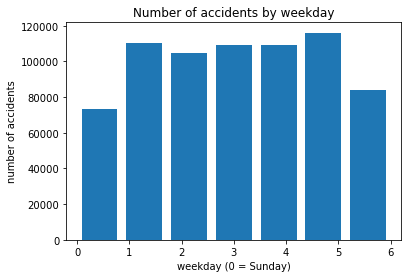

In [5]:
# during the weekend, i.e. saturday (6) and sunday (0), less accidents. 
plt.hist(accidents_df['weekday'], bins=7, rwidth=0.8)
plt.title("Number of accidents by weekday")
plt.xlabel("weekday (0 = Sunday)")
plt.ylabel("number of accidents")

Text(0, 0.5, 'number of accidents')

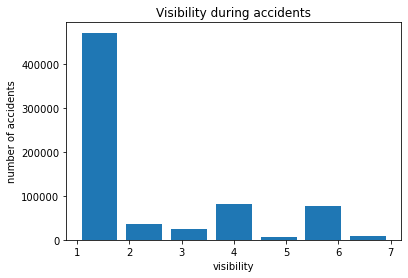

In [14]:
# most of the accidents happened during day, when visibility was not worsened by weather conditions

plt.hist(accidents_df['visibility'], bins=7, rwidth=0.8)

plt.title("Visibility during accidents")
plt.xlabel("visibility")
plt.ylabel("number of accidents")

Text(0, 0.5, 'number of accidents')

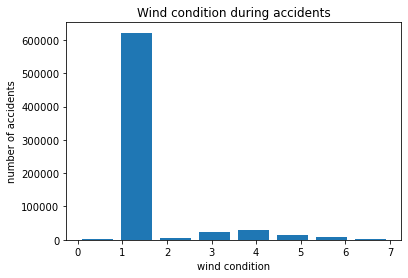

In [15]:
# most of the accidents happened during normal wind conditions

plt.hist(accidents_df['wind_condition'], bins=8, rwidth=0.8)
plt.title("Wind condition during accidents")
plt.xlabel("wind condition")
plt.ylabel("number of accidents")

Text(0, 0.5, 'number of accidents')

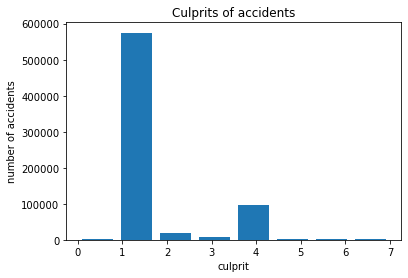

In [16]:
# main culprit = almost always driver of the motor vehicle

plt.hist(accidents_df['culprits_of_accident'], bins=8, rwidth=0.8)
plt.title("Culprits of accidents")
plt.xlabel("culprit")
plt.ylabel("number of accidents")

In [17]:
daily_count = accidents_df.groupby(accidents_df['date'].dt.date)['date'].count()
monthly_count = accidents_df.groupby(accidents_df['date'].dt.to_period('M'))['date'].count()
yearly_count = accidents_df.groupby(accidents_df['date'].dt.to_period('Y'))['date'].count()


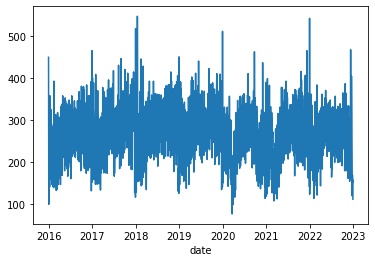

In [18]:
daily_count.plot()

Text(0, 0.5, 'number of accidents')

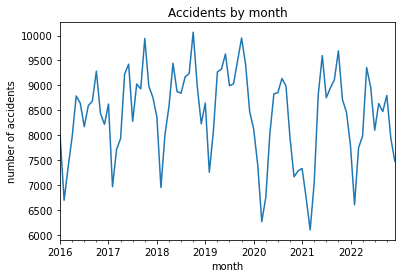

In [19]:
monthly_count.plot()
plt.title("Accidents by month")
plt.xlabel("month")
plt.ylabel("number of accidents")

Text(0, 0.5, 'number of accidents')

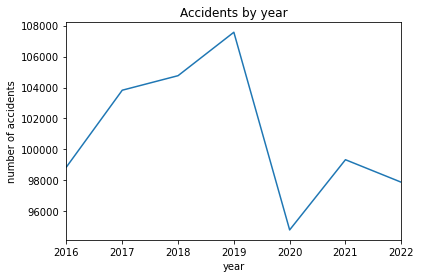

In [20]:
yearly_count.plot()
plt.title("Accidents by year")
plt.xlabel("year")
plt.ylabel("number of accidents")